In [171]:
import numpy as np
import matplotlib.pyplot as plt
import math

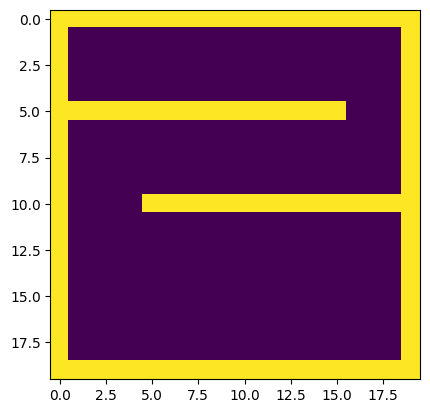

In [172]:
reality = -(np.pad(np.ones((18,18)),1)  - 1)
for ((wx1,wy1),(wx2,wy2)) in [((5,0),(5,15)),((10,5),(10,20))]:
    reality[wx1:wx2+1,wy1:wy2+1] = 1
    
plt.imshow(reality)
plt.show()

In [173]:
class queue :
    def __init__(self,n):
        self.data = np.full((n,2),0)
        self.head = 0
    def push(self, x,y):
        self.data[self.head] = [x,y]
        self.head += 1
        if self.head == len(self.data):
            self.head = 0
    
    def __iter__(self):
        return self.data[self.head:].__iter__()


In [174]:
robot_real = {
    "position": (15,15),
    "rotation": -45, #degrees
    "sonar_p": (.97, .1),
    "pos_p": (.99, .2),
    "rot_p": (1.04, .2)
}

In [175]:
def sonar(real, step=.0001, angle=0):
    position = real["position"]
    r = real["rotation"] + angle
    orientation = np.array([math.cos(r), math.sin(r)])
    print(math.sqrt(orientation[0]**2 + orientation[1]**2))

    dist = 0
    while(reality[int(position[0]),int(position[1])] != 1):
        print(position)
        dist += step
        position += orientation * step

    print([int(position[0]),int(position[1])], reality[int(position[0]),int(position[1])]   )
    ret = np.random.normal(*real["sonar_p"]) * dist
    print(ret)
    return ret

In [176]:
q = queue(30)


for i in range(10):
    r = robot_real["rotation"] + 45
    orientation = np.array([math.cos(r), math.sin(r)])
    dist = sonar(robot_real, angle=+45)
    pos = robot_real["position"] + (orientation * dist)
    print(pos)
    q.push(*pos)
    
    r = robot_real["rotation"] - 45
    orientation = np.array([math.cos(r), math.sin(r)])
    dist = sonar(robot_real, angle=-45)
    pos = robot_real["position"] + (orientation * dist)
    print(pos)
    q.push(*pos)
    
    r = robot_real["rotation"]
    orientation = np.array([math.cos(r), math.sin(r)])
    dist = sonar(robot_real)
    pos = robot_real["position"] + (orientation * dist)
    print(pos)
    q.push(int(pos[0]),int(pos[1]))

   




1.0
(15, 15)
[15.1 15. ]
[15.2 15. ]
[15.3 15. ]
[15.4 15. ]
[15.5 15. ]
[15.6 15. ]
[15.7 15. ]
[15.8 15. ]
[15.9 15. ]
[16. 15.]
[16.1 15. ]
[16.2 15. ]
[16.3 15. ]
[16.4 15. ]
[16.5 15. ]
[16.6 15. ]
[16.7 15. ]
[16.8 15. ]
[16.9 15. ]
[17. 15.]
[17.1 15. ]
[17.2 15. ]
[17.3 15. ]
[17.4 15. ]
[17.5 15. ]
[17.6 15. ]
[17.7 15. ]
[17.8 15. ]
[17.9 15. ]
[18. 15.]
[18.1 15. ]
[18.2 15. ]
[18.3 15. ]
[18.4 15. ]
[18.5 15. ]
[18.6 15. ]
[18.7 15. ]
[18.8 15. ]
[18.9 15. ]
[19, 15] 1.0
3.2863943385116925
[18.28639434 15.        ]
1.0
(15, 15)
[14.95519264 14.91060033]
[14.91038528 14.82120067]
[14.86557792 14.731801  ]
[14.82077055 14.64240133]
[14.77596319 14.55300167]
[14.73115583 14.463602  ]
[14.68634847 14.37420234]
[14.64154111 14.28480267]
[14.59673375 14.195403  ]
[14.55192638 14.10600334]
[14.50711902 14.01660367]
[14.46231166 13.927204  ]
[14.4175043  13.83780434]
[14.37269694 13.74840467]
[14.32788958 13.659005  ]
[14.28308221 13.56960534]
[14.23827485 13.48020567]
[14.19346749

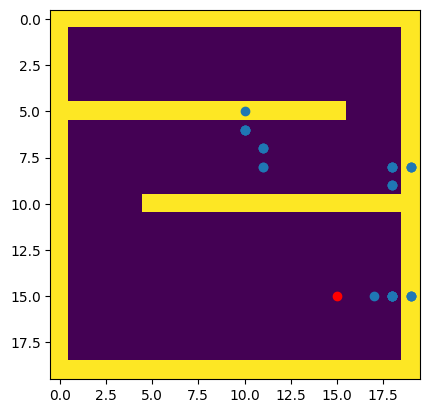

In [178]:
x,y = robot_real["position"]
plt.plot(x,y,'o', color='red')
plt.imshow(reality)

x, y = q.data.T
plt.scatter(x,y)
plt.show()